In [16]:
#import and parameters
from __future__ import division
import csv
import pandas as pd
import numpy as np
import os, glob
import statistics
from statistics import mean,stdev
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from numpy import nanmean,nanstd
from statsmodels.stats.anova import AnovaRM,anova_lm

folder = {'resultsfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/results',
         'designfolder': '/Users/chendanlei/Google Drive/Predictive Affect Experiment/piloting analysis for pair/design results'}

param ={'num_examplars_structured': 6}
param['NN_pairs'] = param['num_examplars_structured']
param['NB_pairs'] = param['num_examplars_structured']
param['BN_pairs'] = param['num_examplars_structured']
param['BB_pairs'] = param['num_examplars_structured']
param['num_examplars_unstructured']=1
param['NN_rand_pairs'] = param['num_examplars_unstructured']
param['BN_rand_pairs'] = param['num_examplars_unstructured']
param['BB_rand_pairs'] = param['num_examplars_unstructured']
param['total_rand_pairs'] = param['NN_rand_pairs']+param['BN_rand_pairs']+param['BB_rand_pairs']
param['pair_types'] = 7
param['rep_per_block'] = 3
param['num_blocks'] = 6
param['num_sessions'] = 1

param['total_pairs']=param['NN_pairs']+param['NB_pairs']+param['BN_pairs']+param['BB_pairs']+param['NN_rand_pairs']+param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_pairs']=param['NN_pairs']+param['NB_pairs']+param['BN_pairs']+param['BB_pairs']
param['total_unstructured_pairs']=param['NN_rand_pairs']+param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_stimuli']=2*param['total_structured_pairs']
param['total_unstructured_stimuli']=2*param['total_unstructured_pairs']
param['total_stimuli']=2*param['total_pairs']
param['total_negstim']=param['NN_pairs']*0+param['NB_pairs']*1+param['BN_pairs']*1+param['BB_pairs']*2+param['NN_rand_pairs']*0+param['BN_rand_pairs']*1+param['BB_rand_pairs']*2
param['total_neustim']=param['NN_pairs']*2+param['NB_pairs']*1+param['BN_pairs']*1+param['BB_pairs']*0+param['NN_rand_pairs']*2+param['BN_rand_pairs']*1+param['BB_rand_pairs']*0

param['total_pairs']=param['NN_pairs']+param['NB_pairs']+param['BN_pairs']+param['BB_pairs']+param['NN_rand_pairs']+param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_pairs']=param['NN_pairs']+param['NB_pairs']+param['BN_pairs']+param['BB_pairs']
param['total_unstructured_pairs']=param['NN_rand_pairs']+param['BN_rand_pairs']+param['BB_rand_pairs']
param['total_structured_stimuli']=2*param['total_structured_pairs']
param['total_unstructured_stimuli']=2*param['total_unstructured_pairs']
param['total_stimuli']=2*param['total_pairs']
param['total_negstim']=param['NN_pairs']*0+param['NB_pairs']*1+param['BN_pairs']*1+param['BB_pairs']*2+param['NN_rand_pairs']*0+param['BN_rand_pairs']*1+param['BB_rand_pairs']*2
param['total_neustim']=param['NN_pairs']*2+param['NB_pairs']*1+param['BN_pairs']*1+param['BB_pairs']*0+param['NN_rand_pairs']*2+param['BN_rand_pairs']*1+param['BB_rand_pairs']*0

param['trials_per_block']= param['total_stimuli'] * param['rep_per_block']


In [31]:
# subj
# param['num_sessions'] = 4
# subj = ['0069','0071','0072','0070']
param['num_sessions'] = 1
subj = ['0069', '0070', '0071', '0072',
        '0065', '0066', '0067', '0073', '0074', '0075', '0078', '0080', '0081', '0082', '0083',
        '0084', '0085', '0086', '0087', '0088', '0089', '0090', '0091', '0092', '0094', '0095',
        '0097', '0100', '0101', '0103', '0104', '0106', '0107', '0108', '0109',
        '0110', '0111', '0113', '0114', '0115', '0116', '0117', '0118', '0120', '0121', '0122',
        '0125', '0126', '0130', '0131', '0132', '0133', '0136']

# #with explicit awareness for at least one pair
# subj = ['0069', '0070', '0071', '0072',
#         '0092','0088','0085','0083','0080','0075',
#         '0074','0065','0066','0089','0086','0078','0108',
#         '0107','0113','0115','0116','0131','0095',
#         '0132','0109','0110']
#ambiguous: 0132,0085,0075,0074
#1 pair:    0109,0070,0107,0108,0095,0088,0083
#2 pairs:   0089,0086,0078,0066,0071,0131,0113,0080
#3 pairs:   0110,0116,0115,0092
#> 3 pairs: 0065,0069,0072,
# #without explicit awareness
# subj = ['0067','0073','0081','0082','0084','0090',
#              '0091','0087','0094','0097',
#              '0100','0101','0103','0104','0106','0111',
#              '0114','0121','0122','0130','0126','0125',
#              '0118','0117','0133','0120']
# subj = ['0067','0097','0106','0111','0121']

# low acc : '0135','0077','0079','0093','0129','0134'],'0076','0105','0128'
# low acc (below 90) : '0135','0077','0076','0079','0093','0105','0129','0134','0128']
# incomplete: '0098','0127'
# no show: '0068','0099','0112','0119'
# subj = ['0102']
# missing data: '0096','0123','0102'

param['num_participants'] = len(subj)
print(param['num_participants'])

53


In [32]:
#this def rearrange a multidimensional list to a scalar-like list... not generic, use with caution
#this function is used here as a better way to 
def reshape2DToScalar(originalList,newList):
    for x in range(len(originalList)):
#         print('x')
#         print(originalList[x])
        for y in range(len(originalList[x])):
#             print('y')
#             print(originalList[x][y])
            newList.append(originalList[x][y])
#     print(len(newList))
    return newList

#repeated measure ANOVAs
def oneWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
    for x in df[df['acc'].isnull()]['subject'].tolist():
        df = df[df['subject'] != x]
    aovrm1way = AnovaRM(df, 'acc', index_names[1], within=[index_names[0]])
    res1way = aovrm1way.fit()

    print(res1way)
    
def twoWayRepeatedANOVA(data, index_names, csvfile_name):
    df=data
    df.to_csv(csvfile_name)
    for x in df[df['acc'].isnull()]['subject'].tolist():
        df = df[df['subject'] != x]
    aovrm2way = AnovaRM(df, 'acc', index_names[2], within=[index_names[0], index_names[1]])
    res2way = aovrm2way.fit()

    print(res2way)
    


In [33]:
#read in results
#2AFC end item
#0: subj 1: test 2: trial 3:condition 4-5:images 6:response 7:Choice 8:history choice 9:RT 
#10:option order 11:test on which item 12:different/same category foil
# #read in the data
os.chdir(folder['resultsfolder'])
AFC2end_all = []

for n in range(len(subj)):
    filename = str(subj[n])+'_testing_2AFC_endItem_results.csv'
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        subj_data = list(reader) 
    subj_data = [x for x in subj_data if x != []]
    AFC2end_all.append(subj_data)
    
condition = []
for n in range(len(AFC2end_all)): #subj
    for x in range(len(AFC2end_all[n][3])):
        condition.append(AFC2end_all[n][3][x])
triplet_type_trial = {}
triplet_type_trial['BB']=[]
triplet_type_trial['BB']=reshape2DToScalar(np.argwhere(np.array(condition) == 'AffAff').tolist(), triplet_type_trial['BB'])
triplet_type_trial['BN']=[]
triplet_type_trial['BN']=reshape2DToScalar(np.argwhere(np.array(condition) == 'AffNeu').tolist(), triplet_type_trial['BN'])
triplet_type_trial['NB']=[]
triplet_type_trial['NB']=reshape2DToScalar(np.argwhere(np.array(condition) == 'NeuAff').tolist(), triplet_type_trial['NB'])
triplet_type_trial['NN']=[]
triplet_type_trial['NN']=reshape2DToScalar(np.argwhere(np.array(condition) == 'NeuNeu').tolist(), triplet_type_trial['NN'])

triplet_type_trial['NN_rand']=[]
triplet_type_trial['NN_rand']=reshape2DToScalar(np.argwhere(np.array(condition) == 'rand_NeuNeu').tolist(), triplet_type_trial['NN_rand'])
triplet_type_trial['BB_rand']=[]
triplet_type_trial['BB_rand']=reshape2DToScalar(np.argwhere(np.array(condition) == 'rand_AffAff').tolist(), triplet_type_trial['BB_rand'])
triplet_type_trial['BN_rand']=[]
triplet_type_trial['BN_rand']=reshape2DToScalar(np.argwhere(np.array(condition) == 'rand_AffNeu').tolist(), triplet_type_trial['BN_rand'])

triplet_type_trial['all']=[]
triplet_type_trial['all'].extend(triplet_type_trial['BB'])
triplet_type_trial['all'].extend(triplet_type_trial['BN'])
triplet_type_trial['all'].extend(triplet_type_trial['NB'])
triplet_type_trial['all'].extend(triplet_type_trial['NN'])
triplet_type_trial['all'].extend(triplet_type_trial['BB_rand'])
triplet_type_trial['all'].extend(triplet_type_trial['BN_rand'])
triplet_type_trial['all'].extend(triplet_type_trial['NN_rand'])

response = []
for n in range(len(AFC2end_all)): #subj
    for x in range(len(AFC2end_all[n][6])):
        response.append(AFC2end_all[n][6][x])
#chose the correct option
correct_trial=[]
correct_trial = reshape2DToScalar(np.argwhere(np.array(response) == '2').tolist(),correct_trial)
#chose all types of incorrect option
incorrect_trial=[]
incorrect_trial = reshape2DToScalar(np.argwhere(np.array(response) != '2').tolist(),incorrect_trial)
#chose the different category foil
diff_category_foil_correct_trial=[]
diff_category_foil_correct_trial = reshape2DToScalar(np.argwhere(np.array(response) == '0').tolist(),diff_category_foil_correct_trial)
#chose the same category foil
same_category_foil_correct_trial=[]
same_category_foil_correct_trial = reshape2DToScalar(np.argwhere(np.array(response) == '1').tolist(),same_category_foil_correct_trial)
#correct option + same category foil = chose the right category
correct_and_same_cateory_foil_trial=[]
correct_and_same_cateory_foil_trial = reshape2DToScalar(np.argwhere(np.array(response) == '1').tolist(),correct_and_same_cateory_foil_trial)
correct_and_same_cateory_foil_trial.extend(correct_trial)

foil_category = []
for n in range(len(AFC2end_all)): #subj
    for x in range(len(AFC2end_all[n][12])):
        foil_category.append(AFC2end_all[n][12][x])
same_category_foil=[]
same_category_foil=reshape2DToScalar(np.argwhere(np.array(foil_category) == 'same category').tolist(),same_category_foil)
diff_category_foil=[]
diff_category_foil=reshape2DToScalar(np.argwhere(np.array(foil_category) == 'different category').tolist(),diff_category_foil)

foil_item = []
for n in range(len(AFC2end_all)): #subj
    for x in range(len(AFC2end_all[n][11])):
        foil_item.append(AFC2end_all[n][11][x])
first_item_foil=[]
first_item_foil=reshape2DToScalar(np.argwhere(np.array(foil_item) == 'first item foil').tolist(),first_item_foil)
third_item_foil=[]
third_item_foil=reshape2DToScalar(np.argwhere(np.array(foil_item) == 'second item foil').tolist(),third_item_foil)

subj_trial = [0]*len(response)
subj_data = [0]*param['num_participants']
count = 0
for n in range(len(AFC2end_all)): #subj
    for x in range(len(AFC2end_all[n][0])): #trial
        subj_trial[count] = n
        count = count+1
for n in range(len(AFC2end_all)): #subj
    subj_data[n] = np.argwhere(np.array(subj_trial) == n)

BN hit: 0.6572327044025155
t = 4.3633989213061595 p = 6.097155780971132e-05

NB hit: 0.6823899371069182
t = 5.276922298669506 p = 2.595231781294807e-06

NN hit: 0.6383647798742139
t = 3.7724354782257445 p = 0.0004154627623143032

BB hit: 0.6698113207547169
t = 6.635350372396315 p = 1.8875428243667248e-08



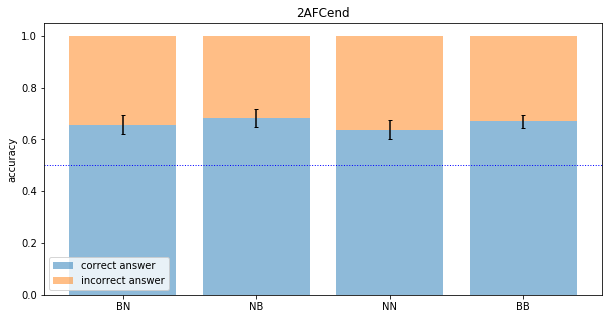

In [35]:
#all
hit_subj={};hit={};hit_stderr={};hit_subj_raw={}
miss_subj={};miss={};miss_stderr={}

for types_of_triplets in ['BN','NB','NN','BB']:
# for types_of_triplets in ['NN_rand','BB_rand','BN_rand']:
    hit_subj[types_of_triplets]=[]
    miss_subj[types_of_triplets]=[]
    for x in range(param['num_participants']): #subj
        where1 = np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets])
        where2 = np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets])
        hit_subj[types_of_triplets].append((len(where1))/(len(where2)))
        
        where1 = np.intersect1d(np.intersect1d(subj_data[x],incorrect_trial),triplet_type_trial[types_of_triplets])
        where2 = np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets])
        miss_subj[types_of_triplets].append((len(where1))/(len(where2)))
       
    hit[types_of_triplets] = np.nanmean(hit_subj[types_of_triplets])
    hit_stderr[types_of_triplets] = np.nanstd(hit_subj[types_of_triplets])/sqrt(len(subj))
    miss[types_of_triplets] = np.nanmean(miss_subj[types_of_triplets])
    miss_stderr[types_of_triplets] = np.nanstd(miss_subj[types_of_triplets])/sqrt(len(subj))
      
#     print(types_of_triplets, 'hit:', hit[types_of_triplets], 'std:', hit_stderr[types_of_triplets])
    print(types_of_triplets, 'hit:', hit[types_of_triplets])
    b=[1/2]*len(hit_subj[types_of_triplets])
    t2, p2 = stats.ttest_rel(hit_subj[types_of_triplets],b)
    print("t = " + str(t2) + " p = " + str(p2))
    print()
    
plt.figure(figsize=(10,5))
objects = (list(hit.keys()))
y_pos = np.arange(len(objects))
p1=plt.bar(y_pos,list(hit.values()), align='center', alpha=0.5,yerr= list(hit_stderr.values()),capsize=2)
# p2=plt.bar(y_pos,list(miss.values()), align='center', alpha=0.5,yerr= list(miss_stderr.values()),bottom=list(hit.values()),capsize=3)
p2=plt.bar(y_pos,list(miss.values()), align='center', alpha=0.5,bottom=list(hit.values()))
plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
plt.xticks(y_pos, objects)
plt.ylabel('accuracy')
plt.legend((p1[0],p2[0]),('correct answer','incorrect answer'),loc='lower left')
plt.title('2AFCend')
plt.show()


In [21]:
#anova
acc1 = hit_subj['BN']+hit_subj['BB']+hit_subj['NB']+hit_subj['NN']
subj1 = list(range(len(hit_subj['BN'])))+list(range(len(hit_subj['BB'])))+list(range(len(hit_subj['NB'])))+list(range(len(hit_subj['NN'])))
pair_type1 = ['BN']*len(hit_subj['BN'])+['BB']*len(hit_subj['BB'])+['NB']*len(hit_subj['NB'])+['NN']*len(hit_subj['NN'])

d= {'acc': acc1,
     'pair_type': pair_type1,
     'subject': subj1}
df = pd.DataFrame(data=d)

oneWayRepeatedANOVA(df,['pair_type','subject'],'hihi.csv')

# #anova
# acc1 = hit_subj['BN_rand']+hit_subj['BB_rand']+hit_subj['NN_rand']
# subj1 = list(range(len(hit_subj['BN_rand'])))+list(range(len(hit_subj['BB_rand'])))+list(range(len(hit_subj['NN_rand'])))
# pair_type1 = ['BN_rand']*len(hit_subj['BN_rand'])+['BB_rand']*len(hit_subj['BB_rand'])+['NN_rand']*len(hit_subj['NN_rand'])

# d= {'acc': acc1,
#      'pair_type': pair_type1,
#      'subject': subj1}
# df = pd.DataFrame(data=d)

# oneWayRepeatedANOVA(df,['pair_type','subject'],'hihi.csv')

                 Anova
          Num DF  Den DF F Value Pr > F
---------------------------------------
pair_type 3.0000 75.0000  1.7875 0.1568



In [22]:
# # same & diff category
# hit_in_same_category_subj={};hit_in_same_category={};hit_in_same_category_stderr={}
# hit_in_diff_category_subj={};hit_in_diff_category={};hit_in_diff_category_stderr={}
# corr_foil_subj={};corr_foil={};corr_foil_stderr={}
# diff_foil_subj={};diff_foil={};diff_foil_stderr={}

# for types_of_triplets in ['all','BN','NB','NN','BB']:

#     hit_in_same_category_subj[types_of_triplets]=[]
#     hit_in_diff_category_subj[types_of_triplets]=[]
#     corr_foil_subj[types_of_triplets]=[]
#     diff_foil_subj[types_of_triplets]=[]
#     for x in range(param['num_participants']): #subj
#         where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),same_category_foil)
#         where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),same_category_foil)
#         if len(where2) != 0:
#             hit_in_same_category_subj[types_of_triplets].append((len(where1))/(len(where2)))
#         else:
#             hit_in_same_category_subj[types_of_triplets].append(np.nan)
        
#         where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),diff_category_foil)
#         where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),diff_category_foil)
#         if len(where2) != 0:
#             hit_in_diff_category_subj[types_of_triplets].append((len(where1))/(len(where2)))
#         else:
#             hit_in_diff_category_subj[types_of_triplets].append(np.nan)

#         where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],same_category_foil_correct_trial),triplet_type_trial[types_of_triplets]),same_category_foil)
#         where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),same_category_foil)
#         if len(where2) != 0:
#             corr_foil_subj[types_of_triplets].append((len(where1))/(len(where2)))
#         else:
#             corr_foil_subj[types_of_triplets].append(np.nan)
        
#         where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],diff_category_foil_correct_trial),triplet_type_trial[types_of_triplets]),diff_category_foil)
#         where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),diff_category_foil)
#         if len(where2) != 0:
#             diff_foil_subj[types_of_triplets].append((len(where1))/(len(where2)))
#         else:
#             diff_foil_subj[types_of_triplets].append(np.nan)

# #     print(types_of_triplets,'hit same category')
# #     b=[1/2]*len(hit_in_same_category_subj[types_of_triplets])
# #     t2, p2 = stats.ttest_ind(hit_in_same_category_subj[types_of_triplets],b)
# #     print("t = " + str(t2) + " p = " + str(p2))
# #     print(types_of_triplets,'hit diff category')
# #     b=[1/2]*len(hit_in_diff_category_subj[types_of_triplets])
# #     t2, p2 = stats.ttest_ind(hit_in_diff_category_subj[types_of_triplets],b)
# #     print("t = " + str(t2) + " p = " + str(p2))
# #     print()
        
#     hit_in_same_category[types_of_triplets] = np.nanmean(hit_in_same_category_subj[types_of_triplets])
#     hit_in_same_category_stderr[types_of_triplets] = np.nanstd(hit_in_same_category_subj[types_of_triplets])/sqrt(len(subj))
    
#     hit_in_diff_category[types_of_triplets] = np.nanmean(hit_in_diff_category_subj[types_of_triplets])
#     hit_in_diff_category_stderr[types_of_triplets] = np.nanstd(hit_in_diff_category_subj[types_of_triplets])/sqrt(len(subj))
    
#     corr_foil[types_of_triplets] = np.nanmean(corr_foil_subj[types_of_triplets])
#     corr_foil_stderr[types_of_triplets] = np.nanstd(corr_foil_subj[types_of_triplets])/sqrt(len(subj))
    
#     diff_foil[types_of_triplets] = np.nanmean(diff_foil_subj[types_of_triplets])
#     diff_foil_stderr[types_of_triplets] = np.nanstd(diff_foil_subj[types_of_triplets])/sqrt(len(subj))
    
# plt.figure(figsize=(10,5))
# objects = (list(hit_in_same_category.keys()))
# y_pos = np.arange(len(objects))
# p1=plt.bar(y_pos,list(hit_in_same_category.values()), align='center', alpha=0.5,yerr= list(hit_in_same_category_stderr.values()),capsize=2)
# # p2=plt.bar(y_pos,list(corr_foil.values()), align='center', alpha=0.5,yerr= list(corr_foil_stderr.values()),bottom=list(hit_in_same_category.values()),capsize=2)
# p2=plt.bar(y_pos,list(corr_foil.values()), align='center', alpha=0.5,bottom=list(hit_in_same_category.values()))
# plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
# plt.xticks(y_pos, objects)
# plt.ylabel('accuracy')
# plt.legend((p1[0],p2[0]),('correct answer','same category foil'),loc='lower left')
# plt.title('2AFCend: correct option + same category foil')
# plt.show()

# plt.figure(figsize=(10,5))
# objects = (list(hit_in_diff_category.keys()))
# y_pos = np.arange(len(objects))
# p1=plt.bar(y_pos,list(hit_in_diff_category.values()), align='center', alpha=0.5,yerr= list(hit_in_diff_category_stderr.values()),capsize=2)
# # p2=plt.bar(y_pos,list(diff_foil.values()), align='center', alpha=0.5,yerr= list(diff_foil_stderr.values()),bottom=list(hit_in_diff_category.values()),capsize=2)
# p2=plt.bar(y_pos,list(diff_foil.values()), align='center', alpha=0.5,bottom=list(hit_in_diff_category.values()))
# plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
# plt.xticks(y_pos, objects)
# plt.ylabel('accuracy')
# plt.legend((p1[0],p2[0]),('correct answer','different category foil'),loc='lower left')
# plt.title('2AFCend: correct option + different category foil')
# plt.show()

BN 1st hit: 0.5512820512820512
t = 0.8795989942670844 p = 0.38745360939534823

BN 2nd hit: 0.5128205128205127
t = 0.1838036555234516 p = 0.8556501872207484

NB 1st hit: 0.5769230769230769
t = 1.1739907202922482 p = 0.251461646687519

NB 2nd hit: 0.6538461538461539
t = 2.7022640946662686 p = 0.012194152974746252

NN 1st hit: 0.5897435897435896
t = 1.4433756729740639 p = 0.16132937688956311

NN 2nd hit: 0.5128205128205127
t = 0.19826289642953562 p = 0.8444427963753227

BB 1st hit: 0.6794871794871795
t = 3.5491408859437565 p = 0.0015604866637923163

BB 2nd hit: 0.6025641025641024
t = 2.475937842360691 p = 0.020414634059564785



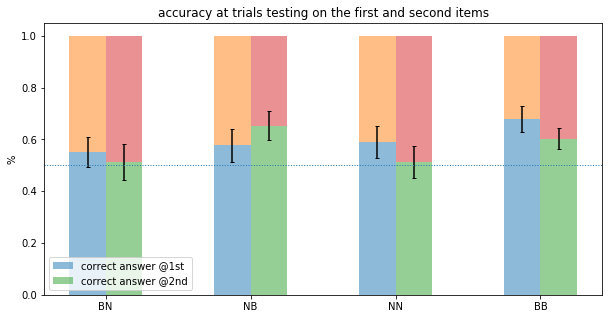

In [23]:
#first & third item
#first item
first_hit_subj={};first_hit={};first_hit_stderr={}
first_miss_subj={};first_miss={};first_miss_stderr={}

#third item
third_hit_subj={};third_hit={};third_hit_stderr={}
third_miss_subj={};third_miss={};third_miss_stderr={}

# for types_of_triplets in ['NN_rand','BB_rand','BN_rand']:
for types_of_triplets in ['BN','NB','NN','BB']:
    
    first_hit_subj[types_of_triplets]=[]
    first_miss_subj[types_of_triplets]=[]
    for x in range(param['num_participants']): #subj
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),first_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),first_item_foil)
        if len(where2) != 0:
            first_hit_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            first_hit_subj[types_of_triplets].append(np.nan)
        
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],incorrect_trial),triplet_type_trial[types_of_triplets]),first_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),first_item_foil)
        if len(where2) != 0:
            first_miss_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            first_miss_subj[types_of_triplets].append(np.nan)

    first_hit[types_of_triplets] = np.nanmean(first_hit_subj[types_of_triplets])
    first_hit_stderr[types_of_triplets] = np.nanstd(first_hit_subj[types_of_triplets])/sqrt(len(subj))
#     print(types_of_triplets, 'hit:', hit[types_of_triplets], 'std:', hit_stderr[types_of_triplets])
    print(types_of_triplets, '1st hit:', first_hit[types_of_triplets])
    b=[1/2]*len(first_hit_subj[types_of_triplets])
    t2, p2 = stats.ttest_rel(first_hit_subj[types_of_triplets],b, nan_policy='omit')
    print("t = " + str(t2) + " p = " + str(p2))
    print()
    
    first_miss[types_of_triplets] = np.nanmean(first_miss_subj[types_of_triplets])
    first_miss_stderr[types_of_triplets] = np.nanstd(first_miss_subj[types_of_triplets])/sqrt(len(subj))


# for types_of_triplets in ['BN','NB','NN','BB']:

    third_hit_subj[types_of_triplets]=[]
    third_miss_subj[types_of_triplets]=[]
    for x in range(param['num_participants']): #subj
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),third_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),third_item_foil)
        if len(where2) != 0:
            third_hit_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            third_hit_subj[types_of_triplets].append(np.nan)
        
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],incorrect_trial),triplet_type_trial[types_of_triplets]),third_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),third_item_foil)
        if len(where2) != 0:
            third_miss_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            third_miss_subj[types_of_triplets].append(np.nan)

    third_hit[types_of_triplets] = np.nanmean(third_hit_subj[types_of_triplets])
    third_hit_stderr[types_of_triplets] = np.nanstd(third_hit_subj[types_of_triplets])/sqrt(len(subj))
#     print(types_of_triplets, 'hit:', hit[types_of_triplets], 'std:', hit_stderr[types_of_triplets])
    print(types_of_triplets, '2nd hit:', third_hit[types_of_triplets])
    b=[1/2]*len(third_hit_subj[types_of_triplets])
    t2, p2 = stats.ttest_rel(third_hit_subj[types_of_triplets],b, nan_policy='omit')
    print("t = " + str(t2) + " p = " + str(p2))
    print()
    
    third_miss[types_of_triplets] = np.nanmean(third_miss_subj[types_of_triplets])
    third_miss_stderr[types_of_triplets] = np.nanstd(third_miss_subj[types_of_triplets])/sqrt(len(subj))
    
plt.figure(figsize=(10,5))
objects = (list(first_hit.keys()))
width = 0.25 
y_pos = np.arange(len(objects))
p1=plt.bar(y_pos,list(first_hit.values()),width, align='center', alpha=0.5,yerr= list(first_hit_stderr.values()),capsize=2)
# p2=plt.bar(y_pos,list(first_miss.values()), align='center', alpha=0.5,yerr= list(first_miss_stderr.values()),bottom=list(first_hit.values()),capsize=2)
p2=plt.bar(y_pos,list(first_miss.values()),width, align='center', alpha=0.5,bottom=list(first_hit.values()))
# plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
# plt.xticks(y_pos, objects)
plt.ylabel('%')
# plt.legend((p1[0],p2[0]),('correct answer @1st','incorrect answer @1st'),loc='lower left')
# plt.title('accuracy at trials testing on the first items')
# plt.show()


# plt.figure(figsize=(10,5))
objects = (list(third_hit.keys()))
y_pos = np.arange(len(objects))+width
p3=plt.bar(y_pos,list(third_hit.values()),width, align='center', alpha=0.5,yerr= list(third_hit_stderr.values()),capsize=2)
# p2=plt.bar(y_pos,list(third_miss.values()), align='center', alpha=0.5,yerr= list(third_miss_stderr.values()),bottom=list(third_hit.values()),capsize=2)
p4=plt.bar(y_pos,list(third_miss.values()),width, align='center', alpha=0.5,bottom=list(third_hit.values()))
plt.axhline(y=1/2,linewidth=1,linestyle=':')
plt.xticks(y_pos-width/2, objects)
plt.ylabel('%')
plt.legend((p1[0],p3[0]),('correct answer @1st','correct answer @2nd'),loc='lower left')
plt.title('accuracy at trials testing on the first and second items')
plt.show()

# print('all')
# t2, p2 = stats.ttest_ind(first_hit_subj['all'],third_hit_subj['all'])
# print("t = " + str(t2) + " p = " + str(p2))

# print(stats.f_oneway(first_hit_subj['BN'],first_hit_subj['BB'],first_hit_subj['NB'],first_hit_subj['NN']))
# print(stats.f_oneway(third_hit_subj['BN'],third_hit_subj['BB'],third_hit_subj['NB'],third_hit_subj['NN']))


In [24]:
#anova
acc1 = first_hit_subj['BN']+first_hit_subj['BB']+first_hit_subj['NB']+first_hit_subj['NN']
subj1 = list(range(len(first_hit_subj['BN'])))+list(range(len(first_hit_subj['BB'])))+list(range(len(first_hit_subj['NB'])))+list(range(len(first_hit_subj['NN'])))
position1 = ['first']*len(acc1)
pair_type1 = ['BN']*len(first_hit_subj['BN'])+['BB']*len(first_hit_subj['BB'])+['NB']*len(first_hit_subj['NB'])+['NN']*len(first_hit_subj['NN'])

acc2 = third_hit_subj['BN']+third_hit_subj['BB']+third_hit_subj['NB']+third_hit_subj['NN']
subj2 = list(range(len(third_hit_subj['BN'])))+list(range(len(third_hit_subj['BB'])))+list(range(len(third_hit_subj['NB'])))+list(range(len(third_hit_subj['NN'])))
position2 = ['second']*len(acc2)
pair_type2 = ['BN']*len(third_hit_subj['BN'])+['BB']*len(third_hit_subj['BB'])+['NB']*len(third_hit_subj['NB'])+['NN']*len(third_hit_subj['NN'])

d= {'acc': acc1+acc2,
     'position': position1+position2,
     'pair_type': pair_type1+pair_type2,
     'subject': subj1+subj2}
df = pd.DataFrame(data=d)

twoWayRepeatedANOVA(df,['position','pair_type','subject'],'hihi.csv')



# #anova
# acc1 = first_hit_subj['BN_rand']+first_hit_subj['BB_rand']+first_hit_subj['NN_rand']
# subj1 = list(range(len(first_hit_subj['BN_rand'])))+list(range(len(first_hit_subj['BB_rand'])))+list(range(len(first_hit_subj['NN_rand'])))
# position1 = ['first']*len(acc1)
# pair_type1 = ['BN_rand']*len(first_hit_subj['BN_rand'])+['BB_rand']*len(first_hit_subj['BB_rand'])+['NN_rand']*len(first_hit_subj['NN_rand'])

# acc2 = third_hit_subj['BN_rand']+third_hit_subj['BB_rand']+third_hit_subj['NN_rand']
# subj2 = list(range(len(third_hit_subj['BN_rand'])))+list(range(len(third_hit_subj['BB_rand'])))+list(range(len(third_hit_subj['NN_rand'])))
# position2 = ['second']*len(acc2)
# pair_type2 = ['BN_rand']*len(third_hit_subj['BN_rand'])+['BB_rand']*len(third_hit_subj['BB_rand'])+['NN_rand']*len(third_hit_subj['NN_rand'])

# d= {'acc': acc1+acc2,
#      'position': position1+position2,
#      'pair_type': pair_type1+pair_type2,
#      'subject': subj1+subj2}
# df = pd.DataFrame(data=d)
# for x in df[df['acc'].isnull()]['acc'].tolist():
#     df = df[df['acc'] != x]
# aovrm2way = AnovaRM(df, 'acc', 'subject', within=['position','pair_type'])
# res2way = aovrm2way.fit()

# twoWayRepeatedANOVA(df,['position','pair_type','subject'],'hihi.csv')



                     Anova
                   Num DF  Den DF F Value Pr > F
------------------------------------------------
position           1.0000 25.0000  0.5906 0.4494
pair_type          3.0000 75.0000  1.7875 0.1568
position:pair_type 3.0000 75.0000  0.9347 0.4283



In [25]:
print(stats.ttest_ind(first_hit_subj['NB'],third_hit_subj['NB']))

Ttest_indResult(statistic=-0.8861942869010875, pvalue=0.37975537608069654)


In [26]:
print(stats.ttest_ind(third_hit_subj['BN'],third_hit_subj['NN']))

Ttest_indResult(statistic=0.0, pvalue=1.0)


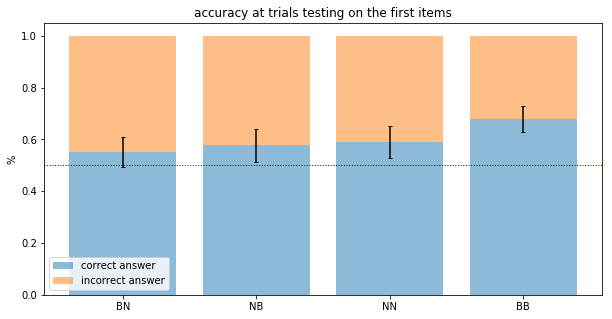

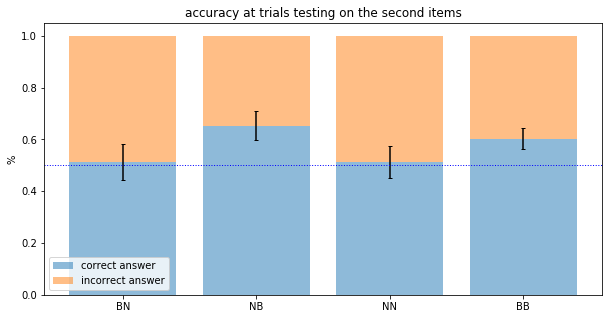

F_onewayResult(statistic=0.881074367334265, pvalue=0.45367085255037776)
F_onewayResult(statistic=1.3928012519561814, pvalue=0.2494372531505472)


In [27]:
#neu & neg item
#first item
first_hit_subj={};first_hit={};first_hit_stderr={}
first_miss_subj={};first_miss={};first_miss_stderr={}

for types_of_triplets in ['BN','NB','NN','BB']:

    first_hit_subj[types_of_triplets]=[]
    first_miss_subj[types_of_triplets]=[]
    for x in range(param['num_participants']): #subj
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),first_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),first_item_foil)
        if len(where2) != 0:
            first_hit_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            first_hit_subj[types_of_triplets].append(np.nan)
        
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],incorrect_trial),triplet_type_trial[types_of_triplets]),first_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),first_item_foil)
        if len(where2) != 0:
            first_miss_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            first_miss_subj[types_of_triplets].append(np.nan)

    first_hit[types_of_triplets] = np.nanmean(first_hit_subj[types_of_triplets])
    first_hit_stderr[types_of_triplets] = np.nanstd(first_hit_subj[types_of_triplets])/sqrt(len(subj))
#         print(types_of_triplets, 'hit:', hit[types_of_triplets], 'std:', hit_std[types_of_triplets])
#     b=[1/2]*len(first_hit_subj[types_of_triplets])
#     t2, p2 = stats.ttest_ind(first_hit_subj[types_of_triplets],b)dd
#     print("t = " + str(t2) + " p = " + str(p2))
#     print()
    
    first_miss[types_of_triplets] = np.nanmean(first_miss_subj[types_of_triplets])
    first_miss_stderr[types_of_triplets] = np.nanstd(first_miss_subj[types_of_triplets])/sqrt(len(subj))

plt.figure(figsize=(10,5))
objects = (list(first_hit.keys()))
y_pos = np.arange(len(objects))
p1=plt.bar(y_pos,list(first_hit.values()), align='center', alpha=0.5,yerr= list(first_hit_stderr.values()),capsize=2)
# p2=plt.bar(y_pos,list(first_miss.values()), align='center', alpha=0.5,yerr= list(first_miss_stderr.values()),bottom=list(first_hit.values()),capsize=2)
p2=plt.bar(y_pos,list(first_miss.values()), align='center', alpha=0.5,bottom=list(first_hit.values()))
plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.legend((p1[0],p2[0]),('correct answer','incorrect answer'),loc='lower left')
plt.title('accuracy at trials testing on the first items')
plt.show()

#third item
third_hit_subj={};third_hit={};third_hit_stderr={}
third_miss_subj={};third_miss={};third_miss_stderr={}

for types_of_triplets in ['BN','NB','NN','BB']:

    third_hit_subj[types_of_triplets]=[]
    third_miss_subj[types_of_triplets]=[]
    for x in range(param['num_participants']): #subj
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],correct_trial),triplet_type_trial[types_of_triplets]),third_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),third_item_foil)
        if len(where2) != 0:
            third_hit_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            third_hit_subj[types_of_triplets].append(np.nan)
        
        where1 = np.intersect1d(np.intersect1d(np.intersect1d(subj_data[x],incorrect_trial),triplet_type_trial[types_of_triplets]),third_item_foil)
        where2 = np.intersect1d(np.intersect1d(subj_data[x],triplet_type_trial[types_of_triplets]),third_item_foil)
        if len(where2) != 0:
            third_miss_subj[types_of_triplets].append((len(where1))/len(where2))
        else:
            third_miss_subj[types_of_triplets].append(np.nan)

    third_hit[types_of_triplets] = np.nanmean(third_hit_subj[types_of_triplets])
    third_hit_stderr[types_of_triplets] = np.nanstd(third_hit_subj[types_of_triplets])/sqrt(len(subj))
#         print(types_of_triplets, 'hit:', hit[types_of_triplets], 'std:', hit_std[types_of_triplets])
    
#     b=[1/2]*len(third_hit_subj[types_of_triplets])
#     t2, p2 = stats.ttest_ind(third_hit_subj[types_of_triplets],b)
#     print("t = " + str(t2) + " p = " + str(p2))
#     print()
    
    third_miss[types_of_triplets] = np.nanmean(third_miss_subj[types_of_triplets])
    third_miss_stderr[types_of_triplets] = np.nanstd(third_miss_subj[types_of_triplets])/sqrt(len(subj))
    
plt.figure(figsize=(10,5))
objects = (list(third_hit.keys()))
y_pos = np.arange(len(objects))
p1=plt.bar(y_pos,list(third_hit.values()), align='center', alpha=0.5,yerr= list(third_hit_stderr.values()),capsize=2)
# p2=plt.bar(y_pos,list(third_miss.values()), align='center', alpha=0.5,yerr= list(third_miss_stderr.values()),bottom=list(third_hit.values()),capsize=2)
p2=plt.bar(y_pos,list(third_miss.values()), align='center', alpha=0.5,bottom=list(third_hit.values()))
plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.legend((p1[0],p2[0]),('correct answer','incorrect answer'),loc='lower left')
plt.title('accuracy at trials testing on the second items')
plt.show()

# print('all')
# t2, p2 = stats.ttest_ind(first_hit_subj['all'],third_hit_subj['all'])
# print("t = " + str(t2) + " p = " + str(p2))

print(stats.f_oneway(first_hit_subj['BN'],first_hit_subj['BB'],first_hit_subj['NB'],first_hit_subj['NN']))
print(stats.f_oneway(third_hit_subj['BN'],third_hit_subj['BB'],third_hit_subj['NB'],third_hit_subj['NN']))




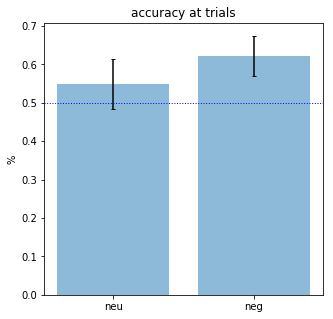

Ttest_relResult(statistic=-1.9350849177555904, pvalue=0.05572242604729153)


In [28]:
neu_hit_subj =[]
neu_hit_subj.extend(first_hit_subj['NN'])
neu_hit_subj.extend(first_hit_subj['NB'])
neu_hit_subj.extend(third_hit_subj['NN'])
neu_hit_subj.extend(third_hit_subj['BN'])
neu_hit = np.mean(neu_hit_subj)
neu_hit_stderr = np.std(neu_hit_subj)/sqrt(len(subj))

neg_hit_subj =[]
neg_hit_subj.extend(first_hit_subj['BB'])
neg_hit_subj.extend(first_hit_subj['BN'])
neg_hit_subj.extend(third_hit_subj['BB'])
neg_hit_subj.extend(third_hit_subj['NB'])
neg_hit = np.mean(neg_hit_subj)
neg_hit_stderr = np.std(neg_hit_subj)/sqrt(len(subj))

plt.figure(figsize=(5,5))
objects = (['neu','neg'])
y_pos = np.arange(len(objects))
p1=plt.bar(y_pos,[neu_hit,neg_hit], align='center', alpha=0.5,yerr=[neu_hit_stderr,neg_hit_stderr],capsize=2)
# p2=plt.bar(y_pos,list(third_miss.values()), align='center', alpha=0.5,yerr= list(third_miss_stderr.values()),bottom=list(third_hit.values()),capsize=2)
plt.axhline(y=1/2,linewidth=1, color='b',linestyle=':')
plt.xticks(y_pos, objects)
plt.ylabel('%')
plt.title('accuracy at trials')
plt.show()

print(stats.ttest_rel(neu_hit_subj,neg_hit_subj))